In [19]:
import pandas as pd 
import numpy as np 
import statistics as s 
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt 

In [15]:
# Manually import data from spreadsheet
awareness = [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0]
privary_concern = [4, 2, 3, 2, 4, 4, 5, 4, 3, 3, 1, 3, 4, 2, 5, 2, 5, 5, 2, 2] 

In [16]:
# Group data by response 
aware_yes = [4, 3, 2, 4, 5, 3, 3, 4, 5, 5, 5, 2]
aware_no = [2, 4, 4, 3, 1, 2, 2, 2]

In [18]:
# Check means 
mean_concern_aware = s.mean(aware_yes)
mean_concern_unaware = s.mean(aware_no)

print('GDPR aware: mean concern score', mean_concern_aware)
print('GDPR unaware: mean concern score', mean_concern_unaware)

GDPR aware: mean concern score 3.75
GDPR unaware: mean concern score 2.5


In [20]:
# Check for significance 
t_stat, p_value = ttest_ind(aware_yes, aware_no)
t_stat, p_value

(2.4632124817678798, 0.024076670729781785)

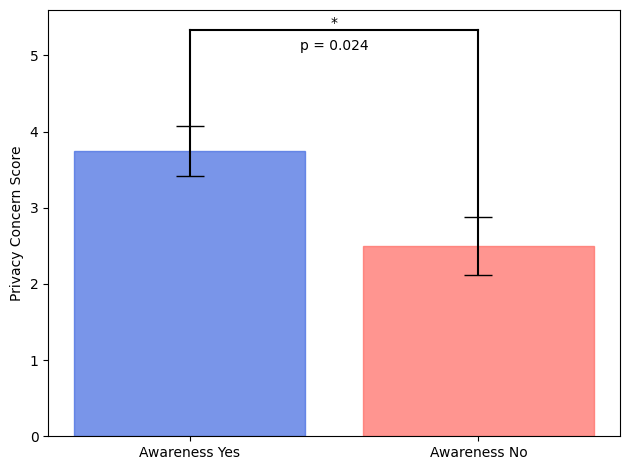

In [51]:
# Calculate means and standard errors of the means for the two groups
means = [np.mean(aware_yes), np.mean(aware_no)]
sems = [np.std(aware_yes, ddof=1) / np.sqrt(len(aware_yes)),
        np.std(aware_no, ddof=1) / np.sqrt(len(aware_no))]

# Define the labels and positions
labels = ['Awareness Yes', 'Awareness No']
x_pos = np.arange(len(labels))

# Create the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(x_pos, means, yerr=sems, align='center', alpha=0.7, ecolor='black', capsize=10)

# Setting individual colors
bars[0].set_color('royalblue')  # First bar
bars[1].set_color('#ff6961')   # Second bar


# Calculate the top of the error bars for both bars
y1 = means[0] + sems[0]
y2 = means[1] + sems[1]


# Setting the height of the significance line to be above the error bars
line_height = max(y1, y2) + 1.25  # Adding a small value to put the line above the error bars
connector_height = line_height + 0

# Drawing the significance line and connectors
ax.plot([x_pos[0], x_pos[0]], [y1, connector_height], color='black', lw=1.5) # Left connector
ax.plot([x_pos[1], x_pos[1]], [y2, line_height], color='black', lw=1.5)      # Right connector, shorter
ax.plot([x_pos[0], x_pos[1]], [connector_height, connector_height], color='black', lw=1.5) # Top connector

# Adding significance stars
ax.text((x_pos[0] + x_pos[1]) / 2, connector_height, '*', ha='center', va='bottom', color='black')

# Labels
ax.set_ylabel('Privacy Concern Score')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Annotate the stat significance on the graph
y_max = max(means) + sems[0] + 0.95
ax.text(0.5, y_max, f'p = {p_value:.3f}', ha='center', va='bottom')

# Show the bar chart
plt.tight_layout()
plt.show()